## Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among its users. The ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

### Plot Customization by Hand

Through this module, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default. It's possible to do these customizations for each individual plot. For example, here is a default histogram:

In [26]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline

(array([  6.,  13.,  84., 166., 235., 250., 145.,  75.,  22.,   4.]),
 array([-3.11685659, -2.48807346, -1.85929032, -1.23050718, -0.60172405,
         0.02705909,  0.65584223,  1.28462536,  1.9134085 ,  2.54219164,
         3.17097477]),
 <BarContainer object of 10 artists>)

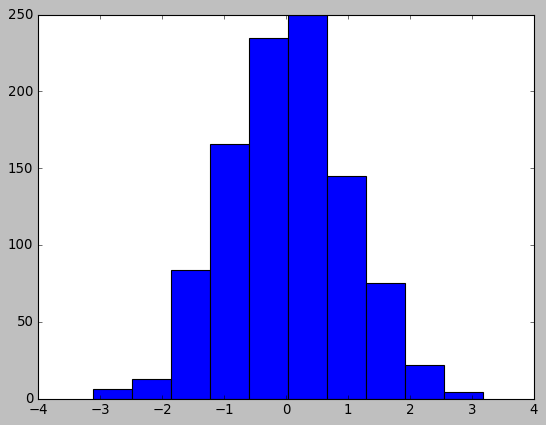

In [27]:
x = np.random.randn(1000)
plt.hist(x)

We can adjust this by hand to make it a much more visually pleasing plot:

(array([ 10.,  33.,  88., 193., 254., 234., 127.,  43.,  15.,   3.]),
 array([-2.9970679 , -2.36101782, -1.72496774, -1.08891766, -0.45286757,
         0.18318251,  0.81923259,  1.45528267,  2.09133275,  2.72738283,
         3.36343291]),
 <BarContainer object of 10 artists>)

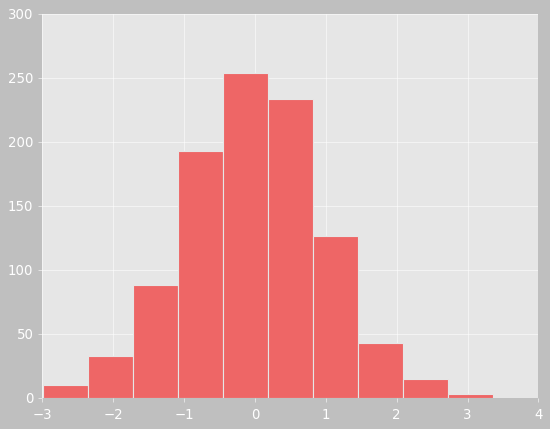

In [7]:
# use a gray background
ax = plt.axes(fc='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='white', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('white')
for tick in ax.get_yticklabels():
    tick.set_color('white')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')

This looks better and is inspired by the look of the R language's `ggplot` visualization package. But this took a whole lot of effort. We definitely don't want to have to do all that tweaking each time we create a plot. Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

### Changing the Defaults: `rcParams`

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the `plt.rc` convenience routine. Let's see what it looks like to modify the rc parameters, so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current `rcParams` dictionary, so we can easily reset these changes in the current session:

In [8]:
default = plt.rcParams.copy()

Now we can use the `plt.rc` function to change some of these settings:

In [30]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='white')
plt.rc('ytick', direction='out', color='white')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

(array([  6.,  13.,  84., 166., 235., 250., 145.,  75.,  22.,   4.]),
 array([-3.11685659, -2.48807346, -1.85929032, -1.23050718, -0.60172405,
         0.02705909,  0.65584223,  1.28462536,  1.9134085 ,  2.54219164,
         3.17097477]),
 <BarContainer object of 10 artists>)

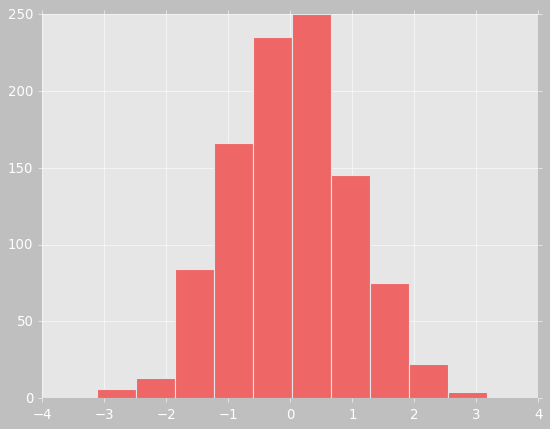

In [31]:
plt.hist(x)

Let's see what simple line plots look like with these rc parameters:

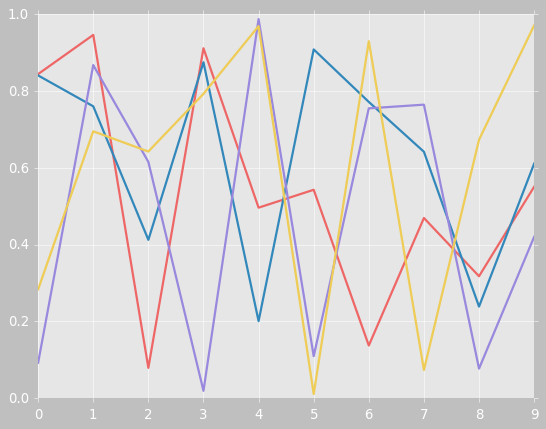

In [13]:
for i in range(4):
    plt.plot(np.random.rand(10))

This is much more aesthetically pleasing than the default styling. If this isn't aesthetically pleasing to you, the good news is that you can adjust the rc parameters to suit your own tastes.

### Stylesheets

Matplotlib has a very convenient `style` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. 

Even if you don't create your own style, the stylesheets included by default are extremely useful. The available styles are listed in `plt.style.available`. Here are the first 5:

In [16]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

The basic way to switch to a stylesheet is to call

`plt.style.use('stylename')`

But keep in mind that this will change the style for the rest of the session. Alternatively, you can use the style context manager, which sets a style temporarily:

`with plt.style.context('stylename'):
    make_a_plot()`

Let's create a function that will make 2 basic types of plots:

In [17]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### Default Style

The default style is what we've been seeing so far throughout this module, and which is what we'll start with. First, let's reset our runtime configuration to the notebook default:

In [18]:
# reset rcParams
plt.rcParams.update(default)

Now let's see how it looks:

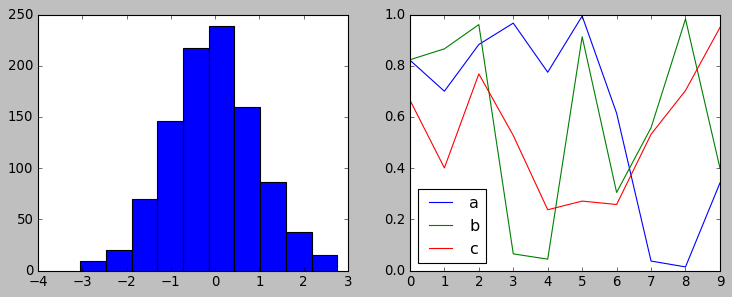

In [19]:
hist_and_lines()

### `fivethirtyeight` Style

The `fivethirtyeight` style mimics the graphics found on the popular FiveThirtyEight website. As we can see here, it is typified by bold colors, thick lines, and transparent axes:

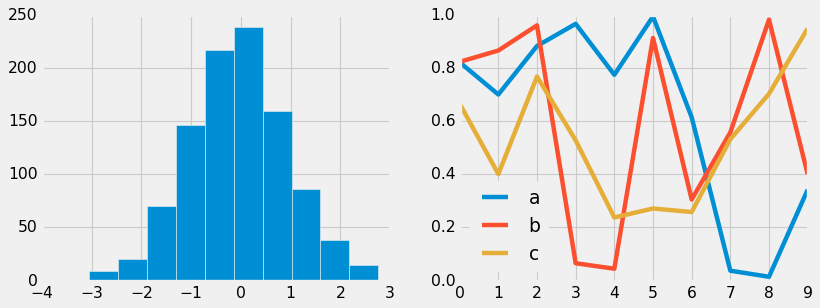

In [20]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### `ggplot`

The `ggplot` package in the R language is a very popular visualization tool. Matplotlib's `ggplot` style mimics the default styles from that package:

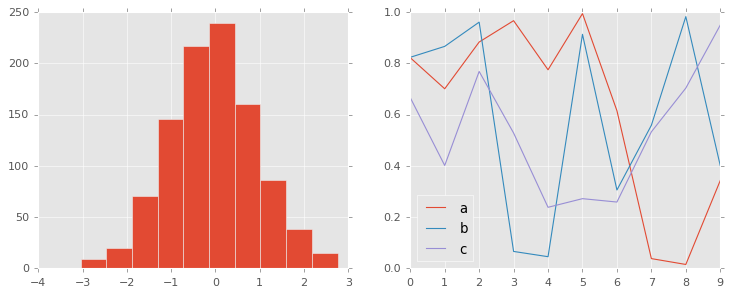

In [21]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers Style

There is a short online book called *Probabilistic Programming and Bayesian Methods for Hackers*, which features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book. This style is reproduced in the `bmh` stylesheet:

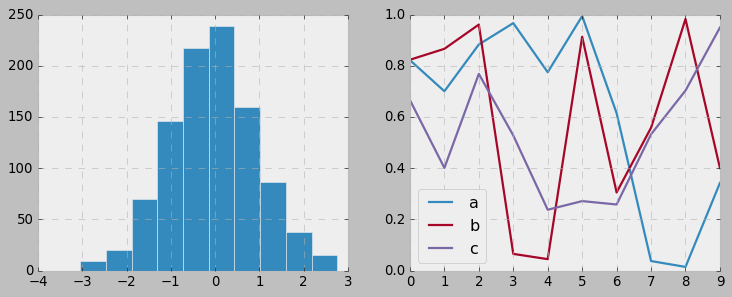

In [22]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark Background

For figures used within presentations, it is often useful to have a dark rather than light background. The `dark_background` style provides this:

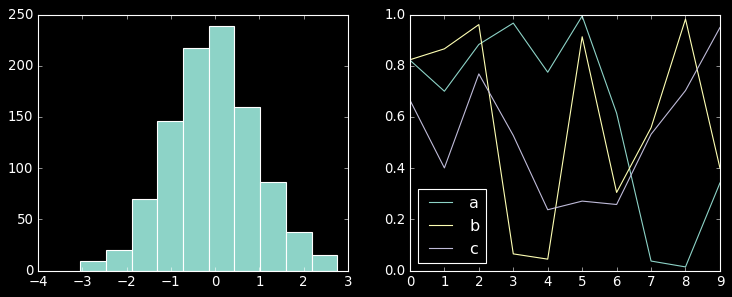

In [23]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures. For this, the `grayscale` style can be very useful:

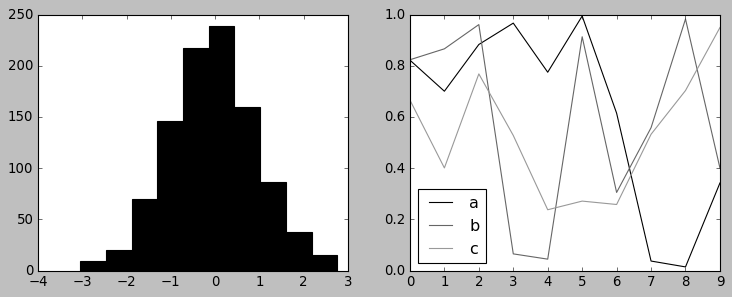

In [24]:
with plt.style.context('grayscale'):
    hist_and_lines()

With all of these built-in options for various plot styles, Matplotlib becomes much more useful for both interactive visualization and creation of figures for publication.